In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

In [17]:
def greatest_meet_smaller_than(p, q):
    possible_rs = np.linspace(0, 1, 100)
    possible_meets = np.minimum(p, possible_rs)
    return np.max(np.where(possible_meets <= q, possible_rs, -np.inf))

negation = lambda x: greatest_meet_smaller_than(x, 0)
meet = np.minimum
join = np.maximum

In [18]:
%matplotlib notebook

class Plotter:
    def __init__(self, plot_data):
            
        self.fig = plt.figure(figsize=(6, 3))
        self.ax = self.fig.add_subplot(1, 1, 1)
        self.ax.set_ylim(0,1)

        # Hide the right and top spines
        self.ax.spines['right'].set_visible(False)
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['bottom'].set_visible(False)
        # Only show ticks on the left spine
        self.ax.tick_params(top=False, bottom=False, right=False, labelbottom=False)
        
        lims = np.linspace(0, 1, 8*2)
        self.xlims = [(lims[index*2], lims[index*2+1]) for index in range(8)]
        
        self.to_plot = self.define_data_for_plotting(*zip(*plot_data))
        
        self.p=0
        self.q=0
    
    def from_data_to_plot_object(self, index, func, text):
        return {
            "lineobject": self.ax.hlines(0.5, *self.xlims[index]),
            "func": func,
            "textobject": self.ax.text(
                np.mean(self.xlims[index]), 0.5, text, usetex=True, horizontalalignment='center')
        }
    
    def define_data_for_plotting(self, texts, functions):
        assert len(texts)==len(functions), "Specify the same number of texts and functions!"
        data = []
        for index, (text, func) in enumerate(zip(texts, functions)):
            data.append(self.from_data_to_plot_object(index, func, text))
        return data
        
    def update_single_hline(self, p, q, lineobject, xlims, func, textobject):
        new_vpos = func(p, q)
        new_position = [np.array(
            [[xlims[0] , new_vpos],
             [xlims[1] , new_vpos]]
        )]
        lineobject.set_segments(new_position)
        textobject.set_y(new_vpos+0.05)

    def remove_last_formula(self, *args):
        to_remove = self.to_plot[-1]
        to_remove["lineobject"].remove()
        to_remove["textobject"].remove()
        self.to_plot =  self.to_plot[:-1]
    
    def add_new_formula(self, button_obj, new_to_display, new_formula):
        to_display_input = new_to_display.value
        formula_input = new_formula.value
        
        non_accepted = (formula_input.replace("(","").replace(")","").replace("p","").replace("q","")
                        .replace("OR","").replace("AND","").replace("TO","").replace("NEG","")
                        .replace(",", "").replace(" ", ""))
        
        if non_accepted != "":
            print("There are unacceptable characters in the formula expression: {}".format(non_accepted))
            return 
        
        formula_input = (formula_input.replace("NEG", "negation").replace("OR", "join")
                            .replace("AND","meet").replace("TO", "greatest_meet_smaller_than"))
        formula = eval("lambda p, q: " + formula_input)
        
        to_display = r"${}$".format(to_display_input)
        
        if len(self.to_plot) >= len(self.xlims):
            print("There are too many formulas, cancel one and re-try!")
            return
        
        self.to_plot.append(self.from_data_to_plot_object(len(self.to_plot), formula, to_display))
        self.update(self.p, self.q)
    
    def draw(self):
        self.fig.canvas.draw()

    def update(self, p, q):  
        self.p=p
        self.q=q
        for index, info in enumerate(self.to_plot):
            self.update_single_hline(p, q, xlims=self.xlims[index], **info)
        self.draw()

<IPython.core.display.Javascript object>


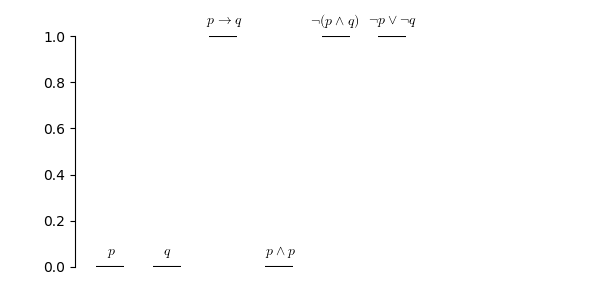

interactive(children=(FloatSlider(value=0.0, description='p', max=1.0, step=0.01), FloatSlider(value=0.0, desc…

Button(description='Remove last', style=ButtonStyle())

Label(value='Use only NEG, OR, AND, TO, p, q, spaces and parentheses for formula.Ex. OR(OR(p, q), NEG(q)) mean…

Label(value='Text is rendered in plot for the formula. Rendered within a $\\LaTeX$ math environment.')

Button(description='Add new', style=ButtonStyle())

In [19]:
plotter = Plotter([    
        [r"$p$", lambda p, q: p],
        [r"$q$", lambda p, q: q],
        [r"$p \rightarrow q$", lambda p, q: greatest_meet_smaller_than(p, q)],
        [r"$p \wedge p$", lambda p, q: meet(p, q)],
        [r"$\neg ( p \wedge q)$", lambda p, q: negation(meet(p, q))],
        [r"$\neg p \lor \neg q$", lambda p, q: join(negation(p), negation(q))],
        [r"$\neg p$", lambda p, q: negation(p)],
        [r"$\neg\neg p$", lambda p, q: negation(negation(p))],
])


interact(plotter.update, p=(0,1,0.01), q=(0,1, 0.01))

erase_last_button = widgets.Button(description="Remove last")
erase_last_button.on_click(plotter.remove_last_formula)
display(erase_last_button)

label_formula = widgets.Label((r"Use only NEG, OR, AND, TO, p, q, spaces and parentheses for formula."
                              r"Ex. OR(OR(p, q), NEG(q)) means $(p \lor q) \lor \neg q $"))
display(label_formula)
new_formula_text = widgets.Text(description="Formula def")
# display(new_formula_text)

label_label = widgets.Label((r"Text is rendered in plot for the formula. Rendered within a $\LaTeX$ math environment."))
display(label_label)
new_display_text = widgets.Text(description="Text")
# display(new_display_text)

new_hbox = widgets.HBox([new_formula_text, new_display_text])
display(new_hbox)

add_new_button = widgets.Button(description="Add new")
add_new_button.on_click(
    lambda button_object: plotter.add_new_formula(button_object, new_display_text, new_formula_text))
display(add_new_button)